## Data Exploration

#### This notebook was used for general data exploration and descriptive stats

In [24]:
import numpy as np
import pandas as pd
import missingno as msno
dtype = {
 'Annual_Premium': 'int64',
 'Claim_Amount': 'float64',
 'Claim_Cause': 'category',
 'Claim_Date': 'category',
 'Claim_Report_Type': 'category',
 'Claimant__Number': 'int64',
 'Education': 'category',
 'Employment_Status': 'category',
 'Fraudulent_Claim': 'category',
 'Gender': 'category',
 'Income': 'int64',
 'Location': 'category',
 'Marital_Status': 'category',
 'Monthly_Premium': 'int64',
 'Months_Since_Last_Claim': 'int64',
 'Months_Since_Policy_Inception': 'int64',
 'Outstanding_Balance': 'float64',
 'State': 'category',
 'State_Code': 'category',
 'Vehicle_Class': 'category',
 'Vehicle_Model': 'category',
 'Vehicle_Size': 'category'}
    
data_train = pd.read_csv('claim_data_v2_train.csv', dtype=dtype, usecols=[*dtype])

In [25]:
data_train["Fraudulent_Claim"].describe()

count     5001
unique       2
top          N
freq      4694
Name: Fraudulent_Claim, dtype: object

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go

In [27]:
gb=data_train[['Location', 'Income']].groupby('Location', as_index=False).mean()
import plotly
plotly.tools.set_credentials_file(username='jeffmoise', api_key='1CzEsYh8Rr6b1VZBgi8B')
data = [go.Bar(
            x=gb['Location'],
            y=gb['Income'],
            orientation = 'v'
)]

py.iplot(data, filename='data_train')



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jeffmoise/0 or inside your plot.ly account where it is named 'data_train'


In [28]:
def visualize_cat(attr, df=data_train):
    df_i = df[['Fraudulent_Claim', attr]].groupby([attr])['Fraudulent_Claim'].agg(['count','sum', 'mean'])
    m = 'Pct Fraud'
    df_i = df_i.rename({'count': 'frequency', 'sum': 'Fraud', 'mean': m}, axis='columns')
    print(df_i)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    df_i['frequency'].plot.bar(ax=ax1, alpha=.8)
    df_i[m].plot.line(ax=ax2, color='k')
    ax1.set_ylabel('frequency')
    ax2.set_ylabel('Pct Fraud')
    ax2.set_ylim(bottom=0, top=1, auto=False)
    ax2.legend()

In [29]:
data_train["Fraudulent_Claim"].describe()

count     5001
unique       2
top          N
freq      4694
Name: Fraudulent_Claim, dtype: object

In [30]:
#Convert Fraud Claim data from Y/N to 1/0 for analysis purposes
data_train.Fraudulent_Claim.replace(('Y', 'N'), (1, 0), inplace=True)

In [31]:
#Test to see if fraud claim data converted correctly 
data_train.head(5)

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
0,KS,Kansas,575.560000,Bachelor,12/01/2018,Employed,F,56274,Suburban,Married,...,32,5,Collision,Agent,Two-Door Car,Midsize,Toyota,25781.0,0,1001
1,NE,Nebraska,697.953590,Bachelor,12/01/2018,Unemployed,F,0,NaN,Single,...,13,42,Scratch/Dent,Agent,Four-Door Car,Midsize,Chevrolet,37061.0,0,1002
2,OK,Oklahoma,1288.743165,Bachelor,12/01/2018,Employed,F,48767,Suburban,Married,...,18,38,Collision,Agent,Two-Door Car,Midsize,Chevrolet,17236.0,0,1003
3,MO,Missouri,764.586183,Bachelor,12/01/2018,Unemployed,M,0,Suburban,Married,...,18,65,Collision,Call Center,SUV,Midsize,Honda,30270.0,0,1004
4,KS,Kansas,281.369258,Bachelor,12/01/2018,Employed,M,43836,Rural,Single,...,52,44,Collision,Agent,Four-Door Car,Midsize,Ford,16263.0,0,1005


In [32]:
data_train.columns

Index(['State_Code', 'State', 'Claim_Amount', 'Education', 'Claim_Date',
       'Employment_Status', 'Gender', 'Income', 'Location', 'Marital_Status',
       'Monthly_Premium', 'Annual_Premium', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Claim_Cause', 'Claim_Report_Type',
       'Vehicle_Class', 'Vehicle_Size', 'Vehicle_Model', 'Outstanding_Balance',
       'Fraudulent_Claim', 'Claimant__Number'],
      dtype='object')

In [33]:
data_train.describe(include='all')

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
count,5001,5001,5001.000000,4990,5001,5001,5001,5.001000e+03,4998,5001,...,5001.000000,5001.000000,5001,5001,5001,5001,5001,4992.000000,5001.000000,5001.000000
unique,5,5,NaN,5,3,5,2,NaN,3,3,...,NaN,NaN,5,4,6,3,4,NaN,NaN,NaN
top,IA,Iowa,NaN,College,12/15/2018,Employed,M,NaN,Suburban,Married,...,NaN,NaN,Collision,Agent,Four-Door Car,Midsize,Toyota,NaN,NaN,NaN
freq,1546,1546,NaN,1492,2000,3126,2531,NaN,3156,2930,...,NaN,NaN,2077,1889,2535,3523,1278,NaN,NaN,NaN
mean,NaN,NaN,787.763253,NaN,NaN,NaN,NaN,4.131045e+04,NaN,NaN,...,15.004199,48.234953,NaN,NaN,NaN,NaN,NaN,23728.152644,0.061388,3501.000000
std,NaN,NaN,655.963269,NaN,NaN,NaN,NaN,2.276904e+05,NaN,NaN,...,11.139649,28.096651,NaN,NaN,NaN,NaN,NaN,13827.401917,0.240064,1443.808678
min,NaN,NaN,189.868369,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,1001.000000
25%,NaN,NaN,402.296353,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,5.000000,24.000000,NaN,NaN,NaN,NaN,NaN,11528.750000,0.000000,2251.000000
50%,NaN,NaN,577.390039,NaN,NaN,NaN,NaN,3.464000e+04,NaN,NaN,...,13.000000,48.000000,NaN,NaN,NaN,NaN,NaN,23993.500000,0.000000,3501.000000
75%,NaN,NaN,886.114954,NaN,NaN,NaN,NaN,6.300900e+04,NaN,NaN,...,23.000000,72.000000,NaN,NaN,NaN,NaN,NaN,35574.000000,0.000000,4751.000000


#### Finding Missing Data Points

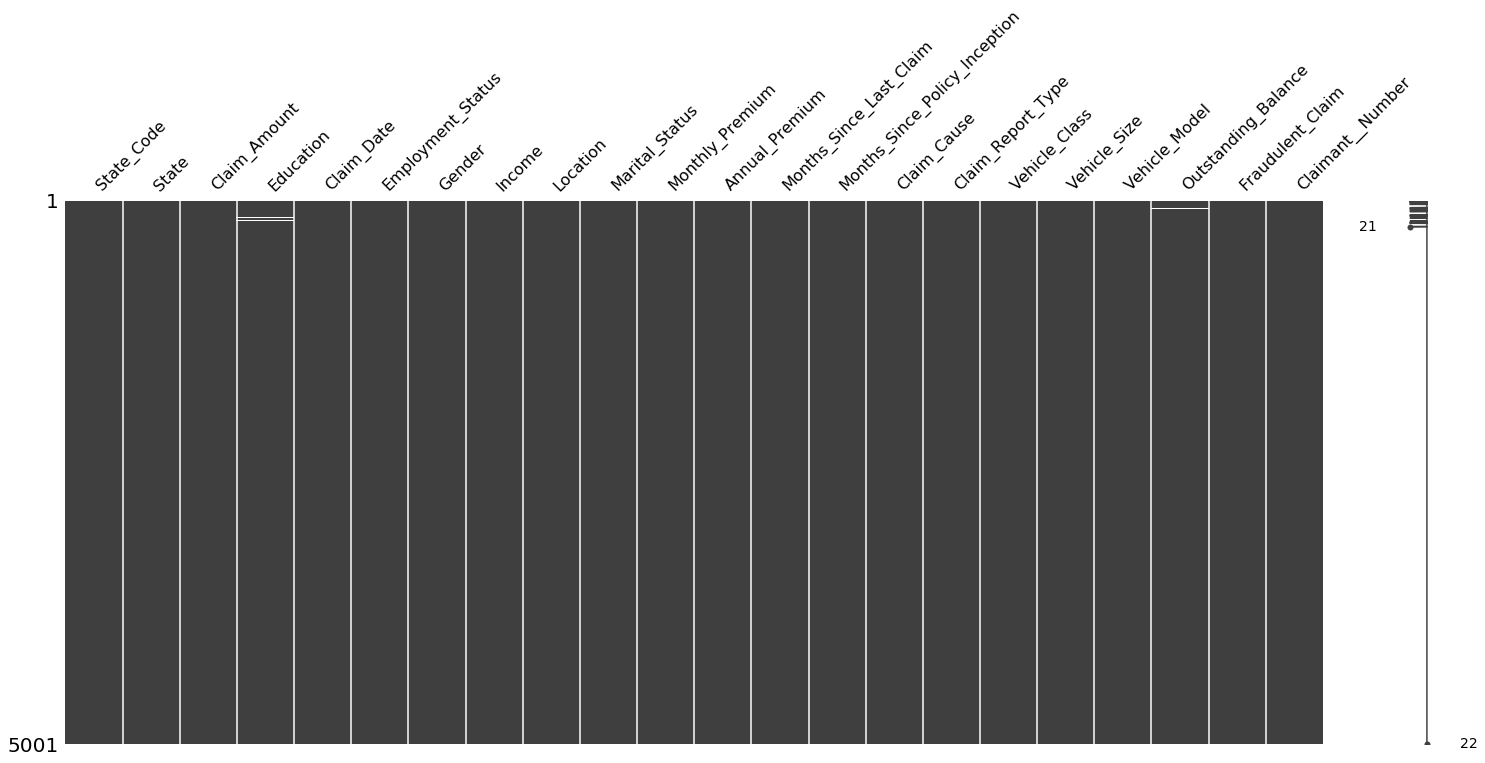

In [34]:
# missing data
msno.matrix(data_train)

In [35]:
data_train.isna().sum()

State_Code                        0
State                             0
Claim_Amount                      0
Education                        11
Claim_Date                        0
Employment_Status                 0
Gender                            0
Income                            0
Location                          3
Marital_Status                    0
Monthly_Premium                   0
Annual_Premium                    0
Months_Since_Last_Claim           0
Months_Since_Policy_Inception     0
Claim_Cause                       0
Claim_Report_Type                 0
Vehicle_Class                     0
Vehicle_Size                      0
Vehicle_Model                     0
Outstanding_Balance               9
Fraudulent_Claim                  0
Claimant__Number                  0
dtype: int64

#### Looking for correlations with a correlation heatmap in seaborn package

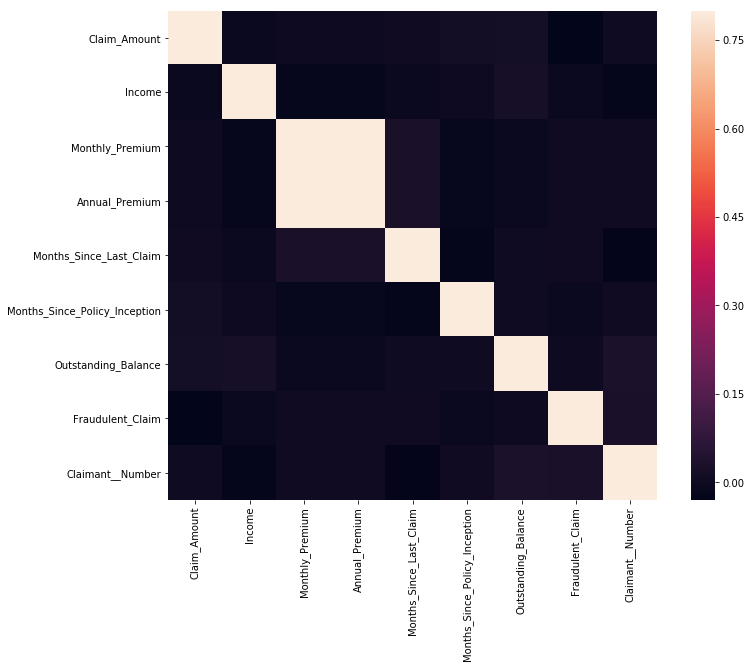

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat= data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Looking at individual variables with histograms 

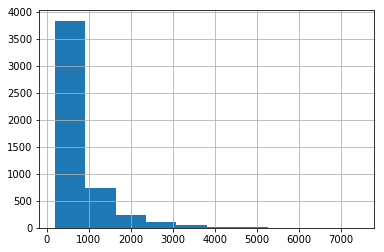

In [37]:
#potential log tranformation
data_train['Claim_Amount'].hist()

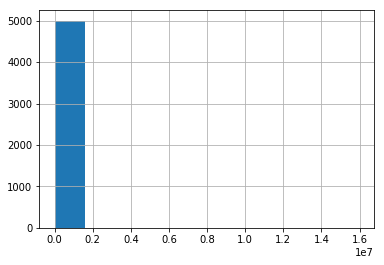

In [38]:
data_train['Income'].describe()
data_train['Income'].hist()

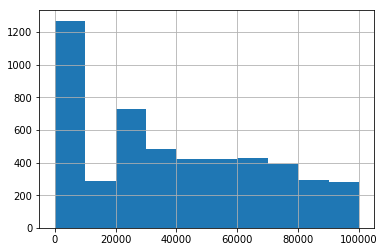

In [39]:
data=data_train['Income'].where(data_train['Income']<=100000,other=100001)
data.hist()

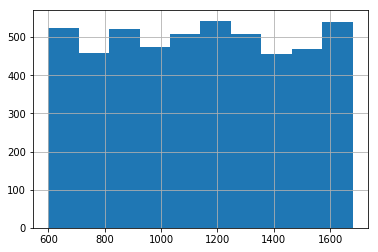

In [40]:
data_train['Annual_Premium'].hist()

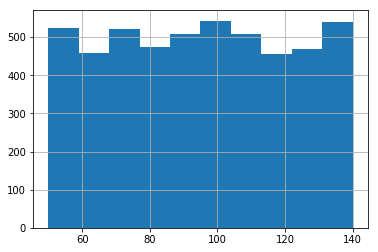

In [41]:
data_train['Monthly_Premium'].hist()

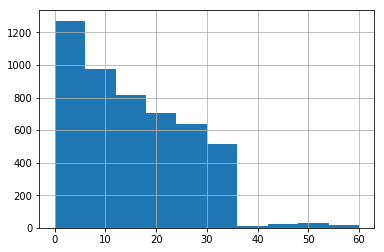

In [42]:
data_train['Months_Since_Last_Claim'].hist()

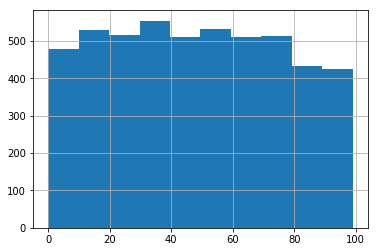

In [43]:
data_train['Months_Since_Policy_Inception'].hist()

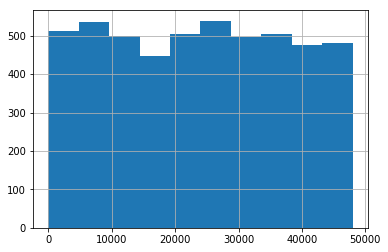

In [44]:
data_train['Outstanding_Balance'].hist()

#### Using violin graphs in the seaborn package to further investigate fraud claim vs certain varibales

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



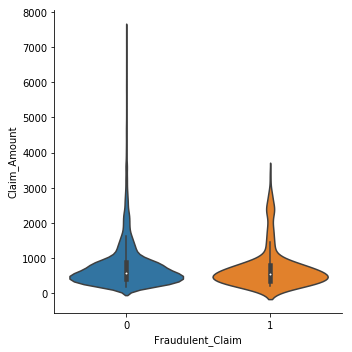

In [45]:
sns.catplot(x="Fraudulent_Claim", y="Claim_Amount", kind="violin",data=data_train);

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



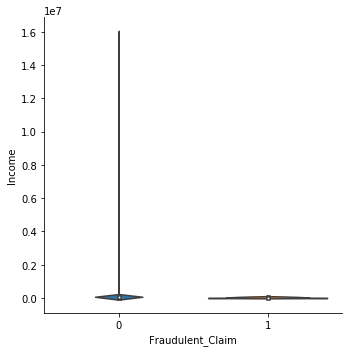

In [46]:
sns.catplot(x="Fraudulent_Claim", y="Income", kind="violin",data=data_train);

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



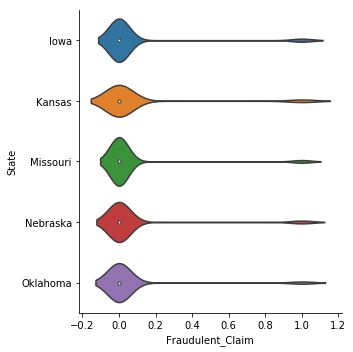

In [47]:
sns.catplot(x="Fraudulent_Claim", y="State", kind="violin",data=data_train);


#### Looking at Claim Cause within the data frame

In [48]:
data_train.Claim_Cause.unique()

[Collision, Scratch/Dent, Hail, Other, Fire]
Categories (5, object): [Collision, Scratch/Dent, Hail, Other, Fire]

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



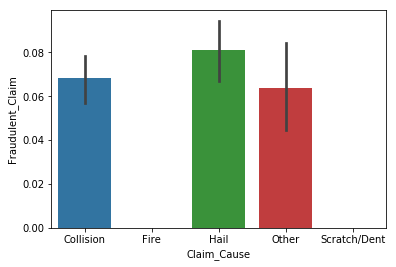

In [49]:
%matplotlib inline

sns.barplot(x="Claim_Cause", y="Fraudulent_Claim", data=data_train);

In [50]:
# Hail slightly higher mean than collision and other but scratch/dent is ZERO
claim_cause1=data_train.groupby('Claim_Cause', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})
print(claim_cause1)

    Claim_Cause Fraudulent_Claim                
                             sum      mean count
0     Collision              142  0.068368  2077
1          Fire                0  0.000000     1
2          Hail              128  0.081115  1578
3         Other               37  0.063793   580
4  Scratch/Dent                0  0.000000   765


#### Grouping by certain variables to look at the sum and percentage of Fraudulent Claims

In [51]:
data_train.groupby('State', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

State Fraudulent_Claim                
                         sum      mean count
0      Iowa              102  0.065977  1546
1    Kansas               35  0.075269   465
2  Missouri               75  0.051867  1446
3  Nebraska               67  0.065558  1022
4  Oklahoma               28  0.053640   522

In [52]:
data_train.groupby('Education', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Education Fraudulent_Claim                
                                     sum      mean count
0              Bachelor               91  0.061033  1491
1               College               88  0.058981  1492
2                Doctor               12  0.057971   207
3  High School or Below               87  0.061922  1405
4                Master               29  0.073418   395

In [53]:
#males have much higher fraud claim mean
data_train.groupby('Gender', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Gender Fraudulent_Claim                
                      sum      mean count
0      F               62  0.025101  2470
1      M              245  0.096800  2531

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



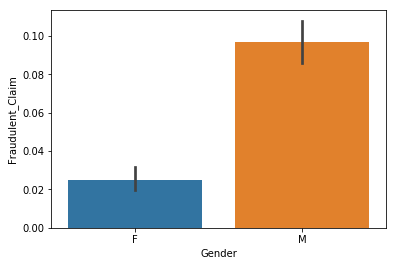

In [54]:
%matplotlib inline

sns.barplot(x="Gender", y="Fraudulent_Claim", data=data_train);

In [55]:
# Four-Door and Two-Door Cars much higher means but also much higher counts
data_train.groupby('Vehicle_Class', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Vehicle_Class Fraudulent_Claim                
                              sum      mean count
0  Four-Door Car              212  0.083629  2535
1     Luxury Car                2  0.025641    78
2     Luxury SUV                3  0.026087   115
3            SUV                3  0.003036   988
4     Sports Car                0  0.000000   256
5   Two-Door Car               87  0.084548  1029

In [56]:
data_train.groupby('Vehicle_Size', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Vehicle_Size Fraudulent_Claim                
                            sum      mean count
0      Compact               50  0.051813   965
1       Luxury               32  0.062378   513
2      Midsize              225  0.063866  3523

In [57]:
data_train.groupby('Vehicle_Model', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Vehicle_Model Fraudulent_Claim                
                             sum      mean count
0     Chevrolet               77  0.060773  1267
1          Ford               77  0.060870  1265
2         Honda               78  0.065491  1191
3        Toyota               75  0.058685  1278

In [58]:
# Unemployed showing highest fraud claim
data_train.groupby('Employment_Status', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Employment_Status Fraudulent_Claim                
                                 sum      mean count
0          Disabled               12  0.056338   213
1          Employed              174  0.055662  3126
2     Medical Leave               15  0.064103   234
3           Retired                7  0.044304   158
4        Unemployed               99  0.077953  1270

In [59]:
#Single tends to show a higher mean of fraud claims
data_train.groupby('Marital_Status', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Marital_Status Fraudulent_Claim                
                              sum      mean count
0       Divorced               37  0.049333   750
1        Married              156  0.053242  2930
2         Single              114  0.086298  1321

In [60]:
data_train.groupby('Location', as_index=False).agg({"Fraudulent_Claim":["sum","mean","count"]})

Location Fraudulent_Claim                
                         sum      mean count
0     Rural               47  0.047910   981
1  Suburban              201  0.063688  3156
2     Urban               59  0.068525   861

#### Heatmap using Cufflinks library
Cufflinks is an extension of plotly that makes it more compatable with pandas dataframes

In [66]:
data_train = pd.read_csv('claim_data_v2_train.csv')
data_train.sample(3)

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
3315,IA,Iowa,265.228965,Doctor,12/15/2018,Unemployed,F,0,Suburban,Single,...,2,35,Collision,Branch,Four-Door Car,Midsize,Toyota,41587.0,N,4316
1151,MO,Missouri,360.093433,High School or Below,12/01/2018,Retired,F,25147,Suburban,Single,...,7,54,Collision,Agent,SUV,Midsize,Honda,31067.0,N,2152
206,MO,Missouri,292.497672,College,12/01/2018,Employed,F,64459,Urban,Married,...,16,64,Hail,Branch,Four-Door Car,Midsize,Ford,42427.0,N,1207


In [67]:
import cufflinks as cf
import plotly
plotly.tools.set_credentials_file(username='cd412', api_key='kOyvGEmesjT6yen20LcW')

In [68]:
def make_heatmap(a, b, agg='count', colorscale='Greys'):
    """Make heatmap from two categorical variables"""
    df = data_train[[a, b, 'Fraudulent_Claim']].copy(deep=True)
    df['Fraudulent_Claim'] = df['Fraudulent_Claim'].replace(('Y', 'N'), (1, 0))
    ct = pd.crosstab(df[a], df[b], values=df['Fraudulent_Claim'], aggfunc=agg)
    df_hm = pd.DataFrame(data=ct.values, index=ct.index.astype('str'), columns=ct.columns)
    print(df_hm)
    return df_hm.iplot(kind='heatmap', colorscale=colorscale)

In [69]:
make_heatmap('State', 'Education', 'mean', 'Reds')

Education  Bachelor   College    Doctor  High School or Below    Master
State                                                                  
Iowa       0.069620  0.058947  0.069444              0.073892  0.051282
Kansas     0.070866  0.076336  0.000000              0.078014  0.111111
Missouri   0.056306  0.049550  0.078431              0.047382  0.049505
Nebraska   0.056291  0.074830  0.022222              0.060811  0.108434
Oklahoma   0.048611  0.040541  0.105263              0.055901  0.081633


PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [70]:
make_heatmap('State', 'Education')

Education  Bachelor  College  Doctor  High School or Below  Master
State                                                             
Iowa            474      475      72                   406     117
Kansas          127      131      20                   141      45
Missouri        444      444      51                   401     101
Nebraska        302      294      45                   296      83
Oklahoma        144      148      19                   161      49


PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [71]:
make_heatmap('Vehicle_Size', 'Vehicle_Model')


Vehicle_Model  Chevrolet  Ford  Honda  Toyota
Vehicle_Size                                 
Compact              225   259    244     237
Luxury               148   121    116     128
Midsize              894   885    831     913


PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud